<a href="https://colab.research.google.com/github/claarr/PCVK_Ganjil_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama : Clarita Putri Anggraeni
### Kelas : TI-3G
### NIM : 2141720213

#### Jobsheet 6

### 1. Import Folder dari Drive

In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


### 2. Import Library

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

# 3. Buat Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

<BarContainer object of 256 artists>

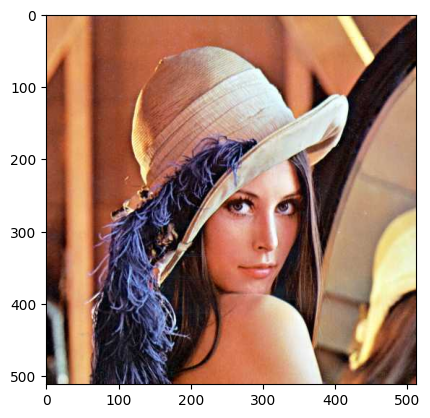

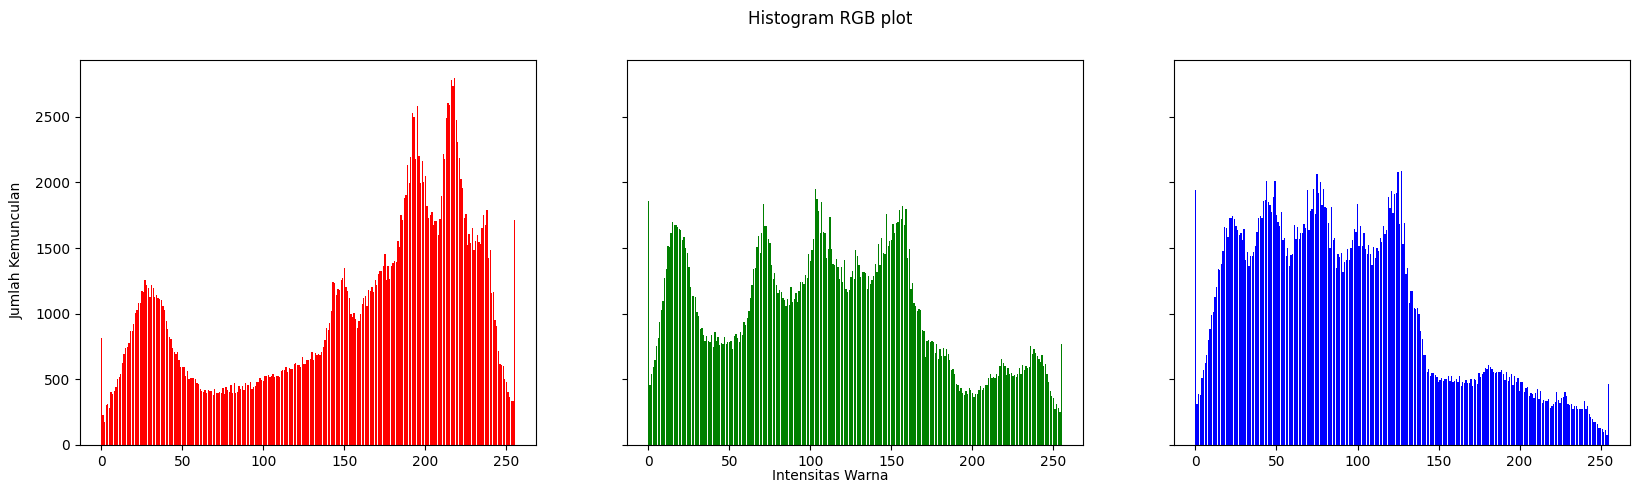

In [ ]:
# input image
img_1 = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/lena.jpg')

# tampilkan image
img_rgb = cv.cvtColor(img_1,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

# menghitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra
height, width, depth = np.shape(img_1)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img_1[y][x][0]] += 1
    green[img_1[y][x][1]] += 1
    red[img_1[y][x][2]] += 1

# membuat histogram dengan sumbu x adalah intensitas warna dan y adalah kemunculan
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

# histogram citra
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

### 4. Setelah mengerjakan no.3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu "histogram". Bandingkan hasilnya. Apakah output muncul sama?

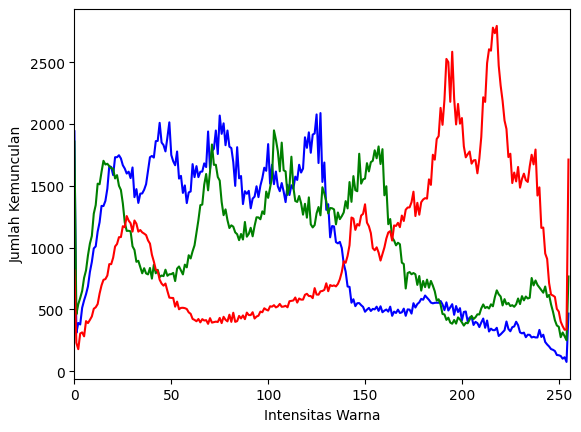

In [ ]:
colors = ("b", "g", "r")
channel_ids = (0,1,2)

# membuat histogram plot dengan numpy

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img_1[:,:, channel_id], bins=256, range=(0,256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

plt.show()

#### Jawab : Output yang muncul sama, tetapi histogram yang ini dijadikan 1, di nomer 3 ada 3 histogram sedangkan di nomer 4 ini digabung

### Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasaran flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

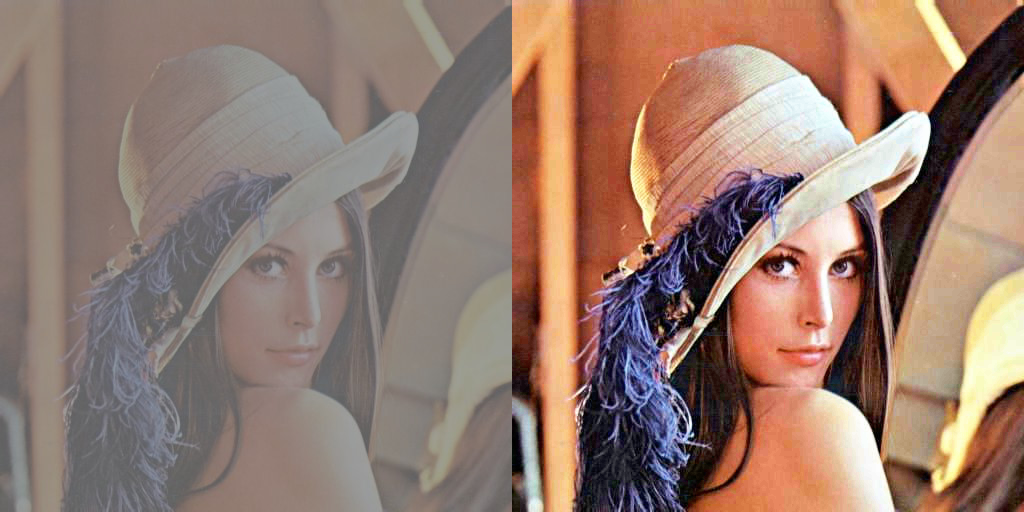

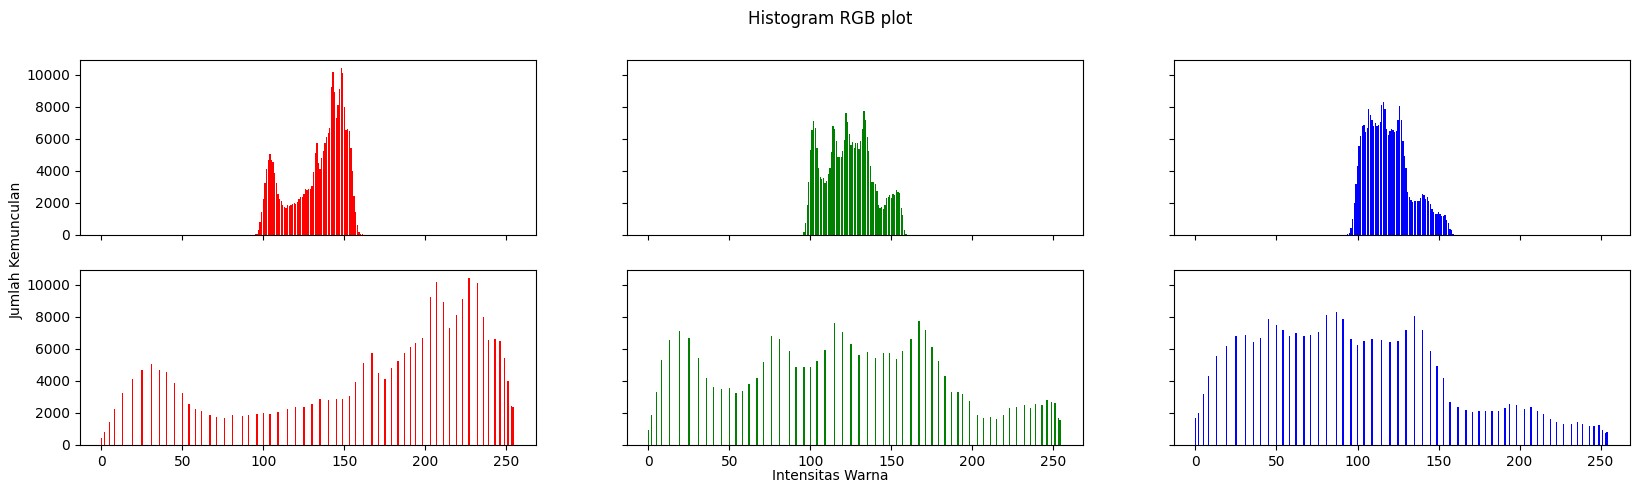

In [ ]:
# input image
img_lena_lc = cv.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/lena_lc.jpg')

#menghitung kemunculan setiap pixel warna pada nilai tertentu
def histog(img_lena_lc):
  height, width, depth = np.shape(img_lena_lc)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img_lena_lc[y][x][0]] += 1
      ax[1][img_lena_lc[y][x][1]] += 1
      ax[2][img_lena_lc[y][x][2]] += 1
  return ax

histo_asli = histog(img_lena_lc)

img_array = np.asarray(img_lena_lc)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

# penjumlahan kumulatif dari frekuensi yang sudah diketahui
num_pixels = np. sum(histogram_array)
# kemudian dibagi dengan jumlah pixel
histogram_array = histogram_array/num_pixels

# normalisasi dengan kumulatif frekuensi seluruh pixel
chistogram_array = np.cumsum(histogram_array)
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)
img_list = list(img_array.flatten())

# konversi ke equalize
eq_img_list = [transform_map[p] for p in img_list]

# transformasi ke bentuk citra
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img_lena_lc, img2))
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

### 6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

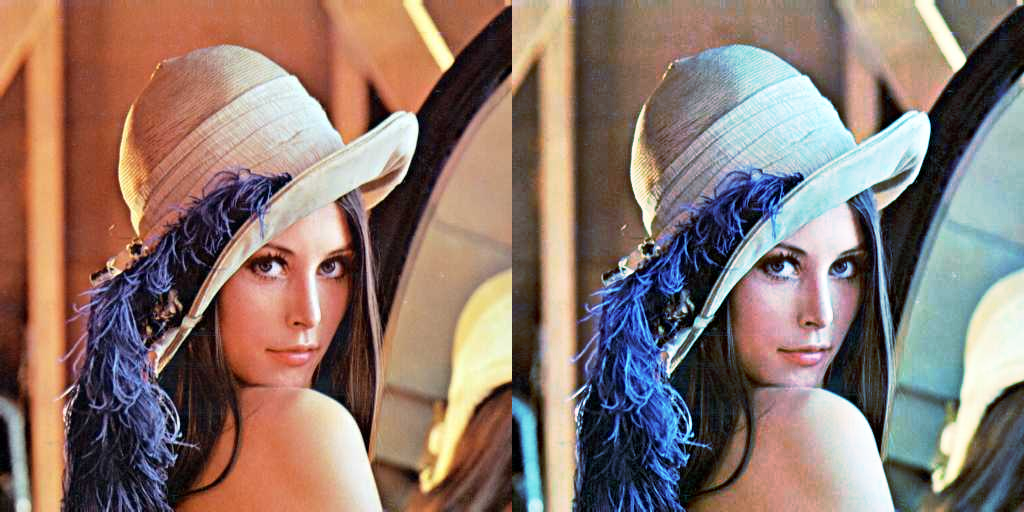

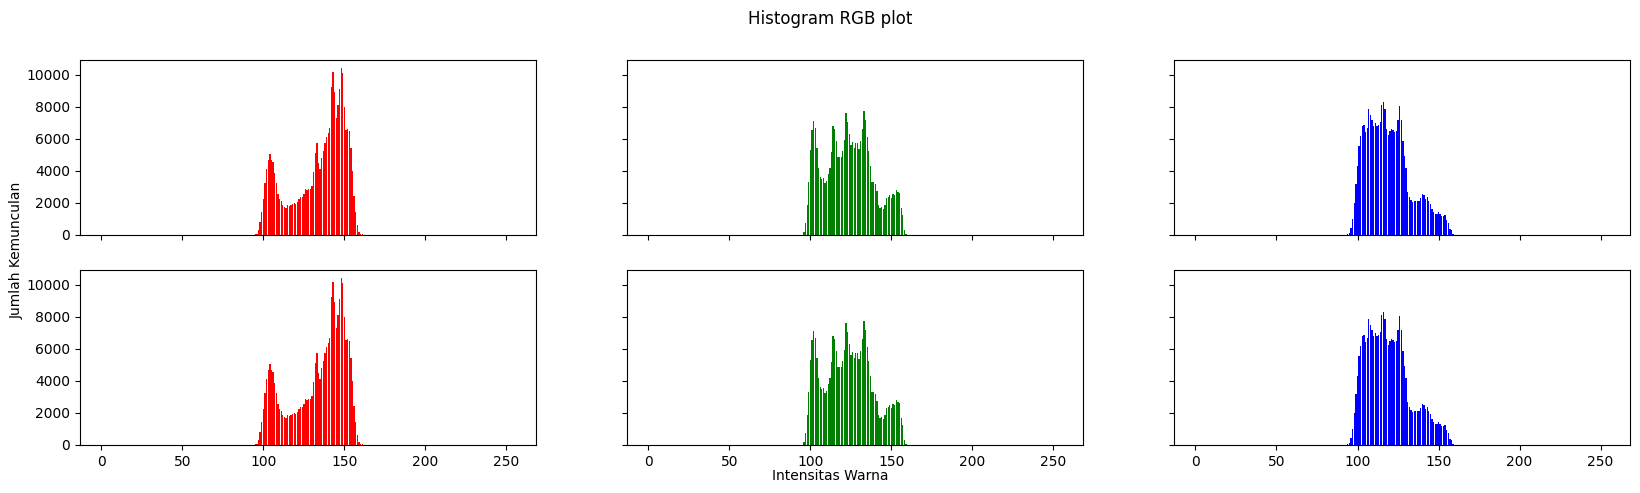

In [ ]:
channels = cv.split(img_1)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img_1, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

### 7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

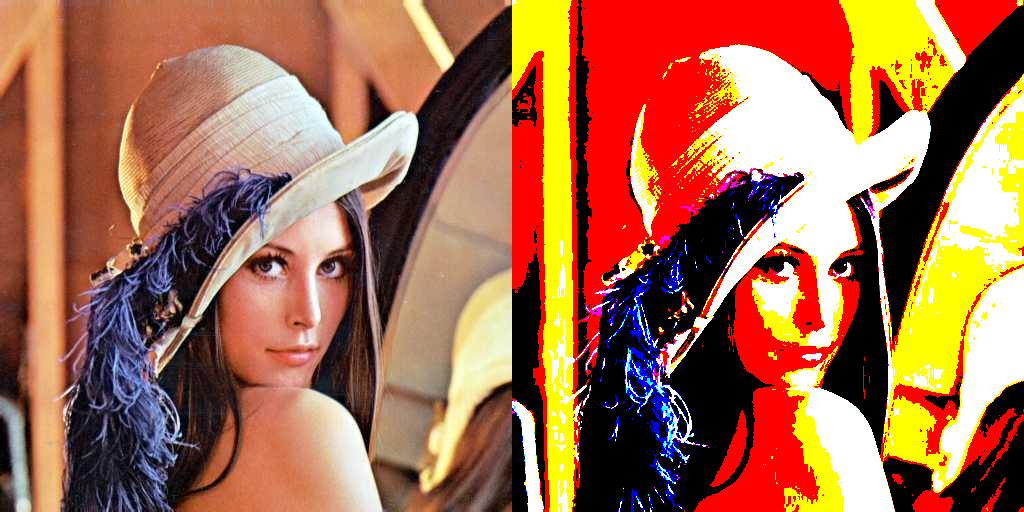

In [ ]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
# cv.imwrite('/content/drive/MyDrive/PCVK/testlena.jpg', img_8)



### 8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

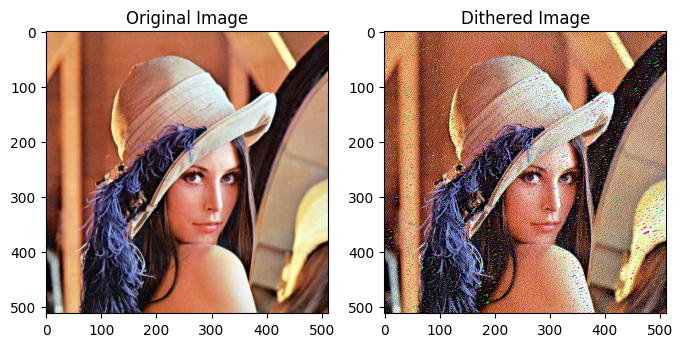

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/lena.jpg')

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Perform Floyd-Steinberg dithering on each color channel separately
def floyd_steinberg_dithering_channel(image_channel):
    height, width = image_channel.shape
    new_channel = np.copy(image_channel)
    for y in range(height):
        for x in range(width):
            old_pixel = new_channel[y, x]
            new_pixel = 255 if old_pixel > 128 else 0
            error = old_pixel - new_pixel
            new_channel[y, x] = new_pixel
            if x < width - 1:
                new_channel[y, x + 1] += error * 7 / 16
            if x > 0 and y < height - 1:
                new_channel[y + 1, x - 1] += error * 3 / 16
            if y < height - 1:
                new_channel[y + 1, x] += error * 5 / 16
            if x < width - 1 and y < height - 1:
                new_channel[y + 1, x + 1] += error * 1 / 16
    return new_channel

# Split the image into color channels
b, g, r = cv2.split(img)

# Apply dithering to each color channel
dithered_b = floyd_steinberg_dithering_channel(b)
dithered_g = floyd_steinberg_dithering_channel(g)
dithered_r = floyd_steinberg_dithering_channel(r)

# Merge the dithered color channels back into a single image
dithered_img = cv2.merge((dithered_b, dithered_g, dithered_r))

# Display the dithered image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dithered_img, cv2.COLOR_BGR2RGB))
plt.title('Dithered Image')

plt.show()

### 9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

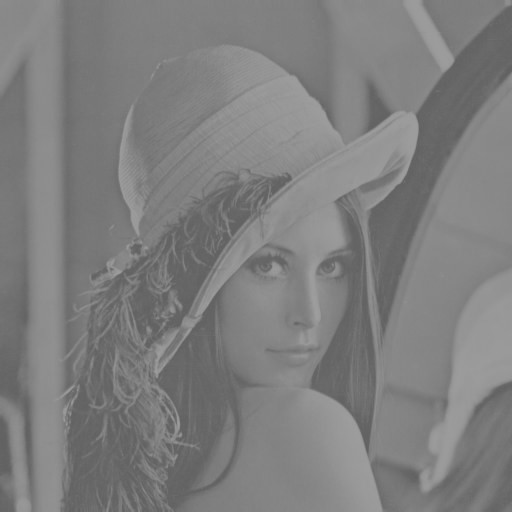

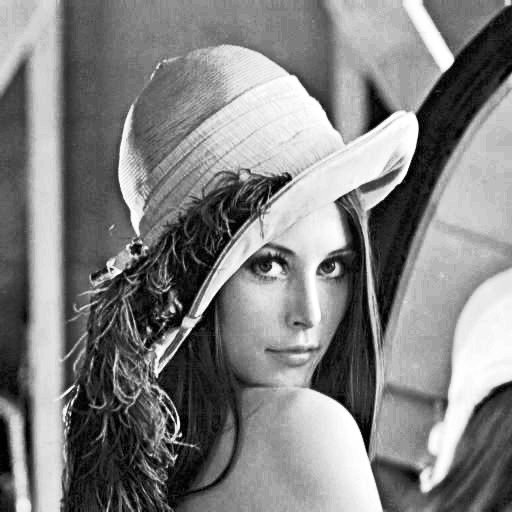

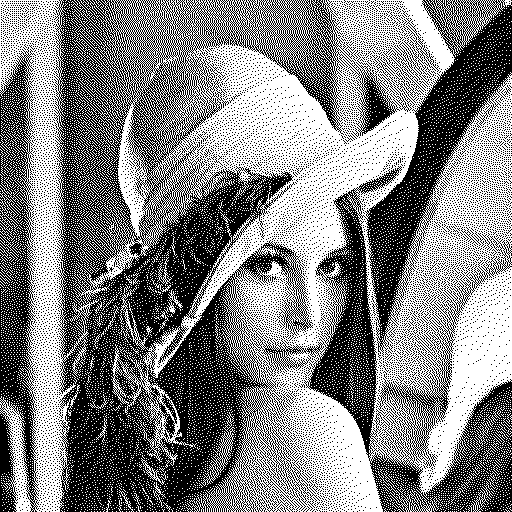

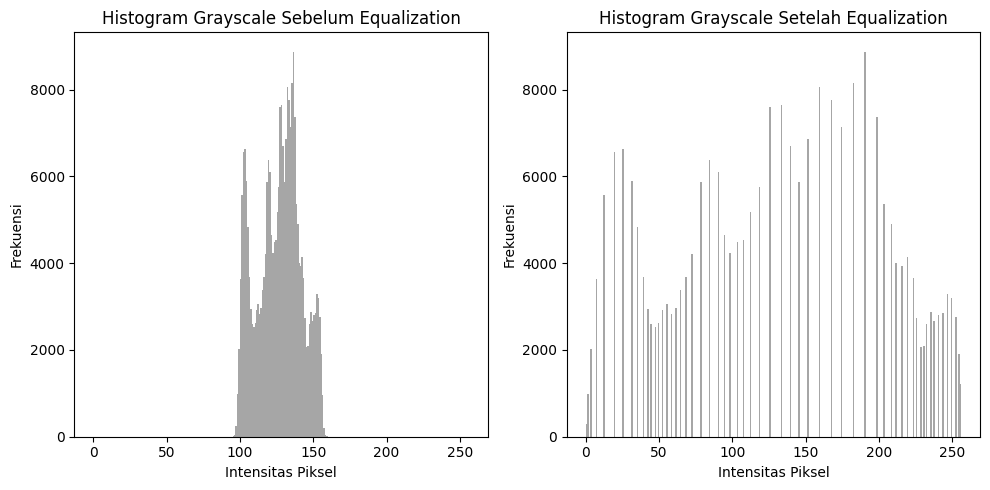

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar dan ubah ke citra grayscale
img = cv2.imread('/content/drive/MyDrive/Kuliah/SEMESTER 5/PCVK/Images/lena_lc.jpg', cv2.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_img = cv2.equalizeHist(img)

# Terapkan proses dithering Floyd and Steinberg
img_float = np.float32(equalized_img)
height, width = img.shape

for y in range(height):
    for x in range(width):
        old_value = img_float[y, x]
        new_value = round(old_value / 255) * 255
        img_float[y, x] = new_value

        error = old_value - new_value

        if x < width - 1:
            img_float[y, x + 1] += error * 7 / 16
        if y < height - 1:
            if x > 0:
                img_float[y + 1, x - 1] += error * 3 / 16
            img_float[y + 1, x] += error * 5 / 16
            if x < width - 1:
                img_float[y + 1, x + 1] += error * 1 / 16

output_img = np.uint8(img_float)

# Menampilkan gambar hasil
cv2_imshow(img)
cv2_imshow(equalized_img)
cv2_imshow(output_img)

# Plot histogram dari citra grayscale
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Sebelum Equalization')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

# Plot histogram dari citra setelah equalization
plt.subplot(122)
plt.hist(equalized_img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Setelah Equalization')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()